Setup

In [42]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

df = pd.read_csv("./output/merged_attack_dataset_method2.csv")
print(df.shape)

(2355, 76)


Heatmap matrix

(75, 75)


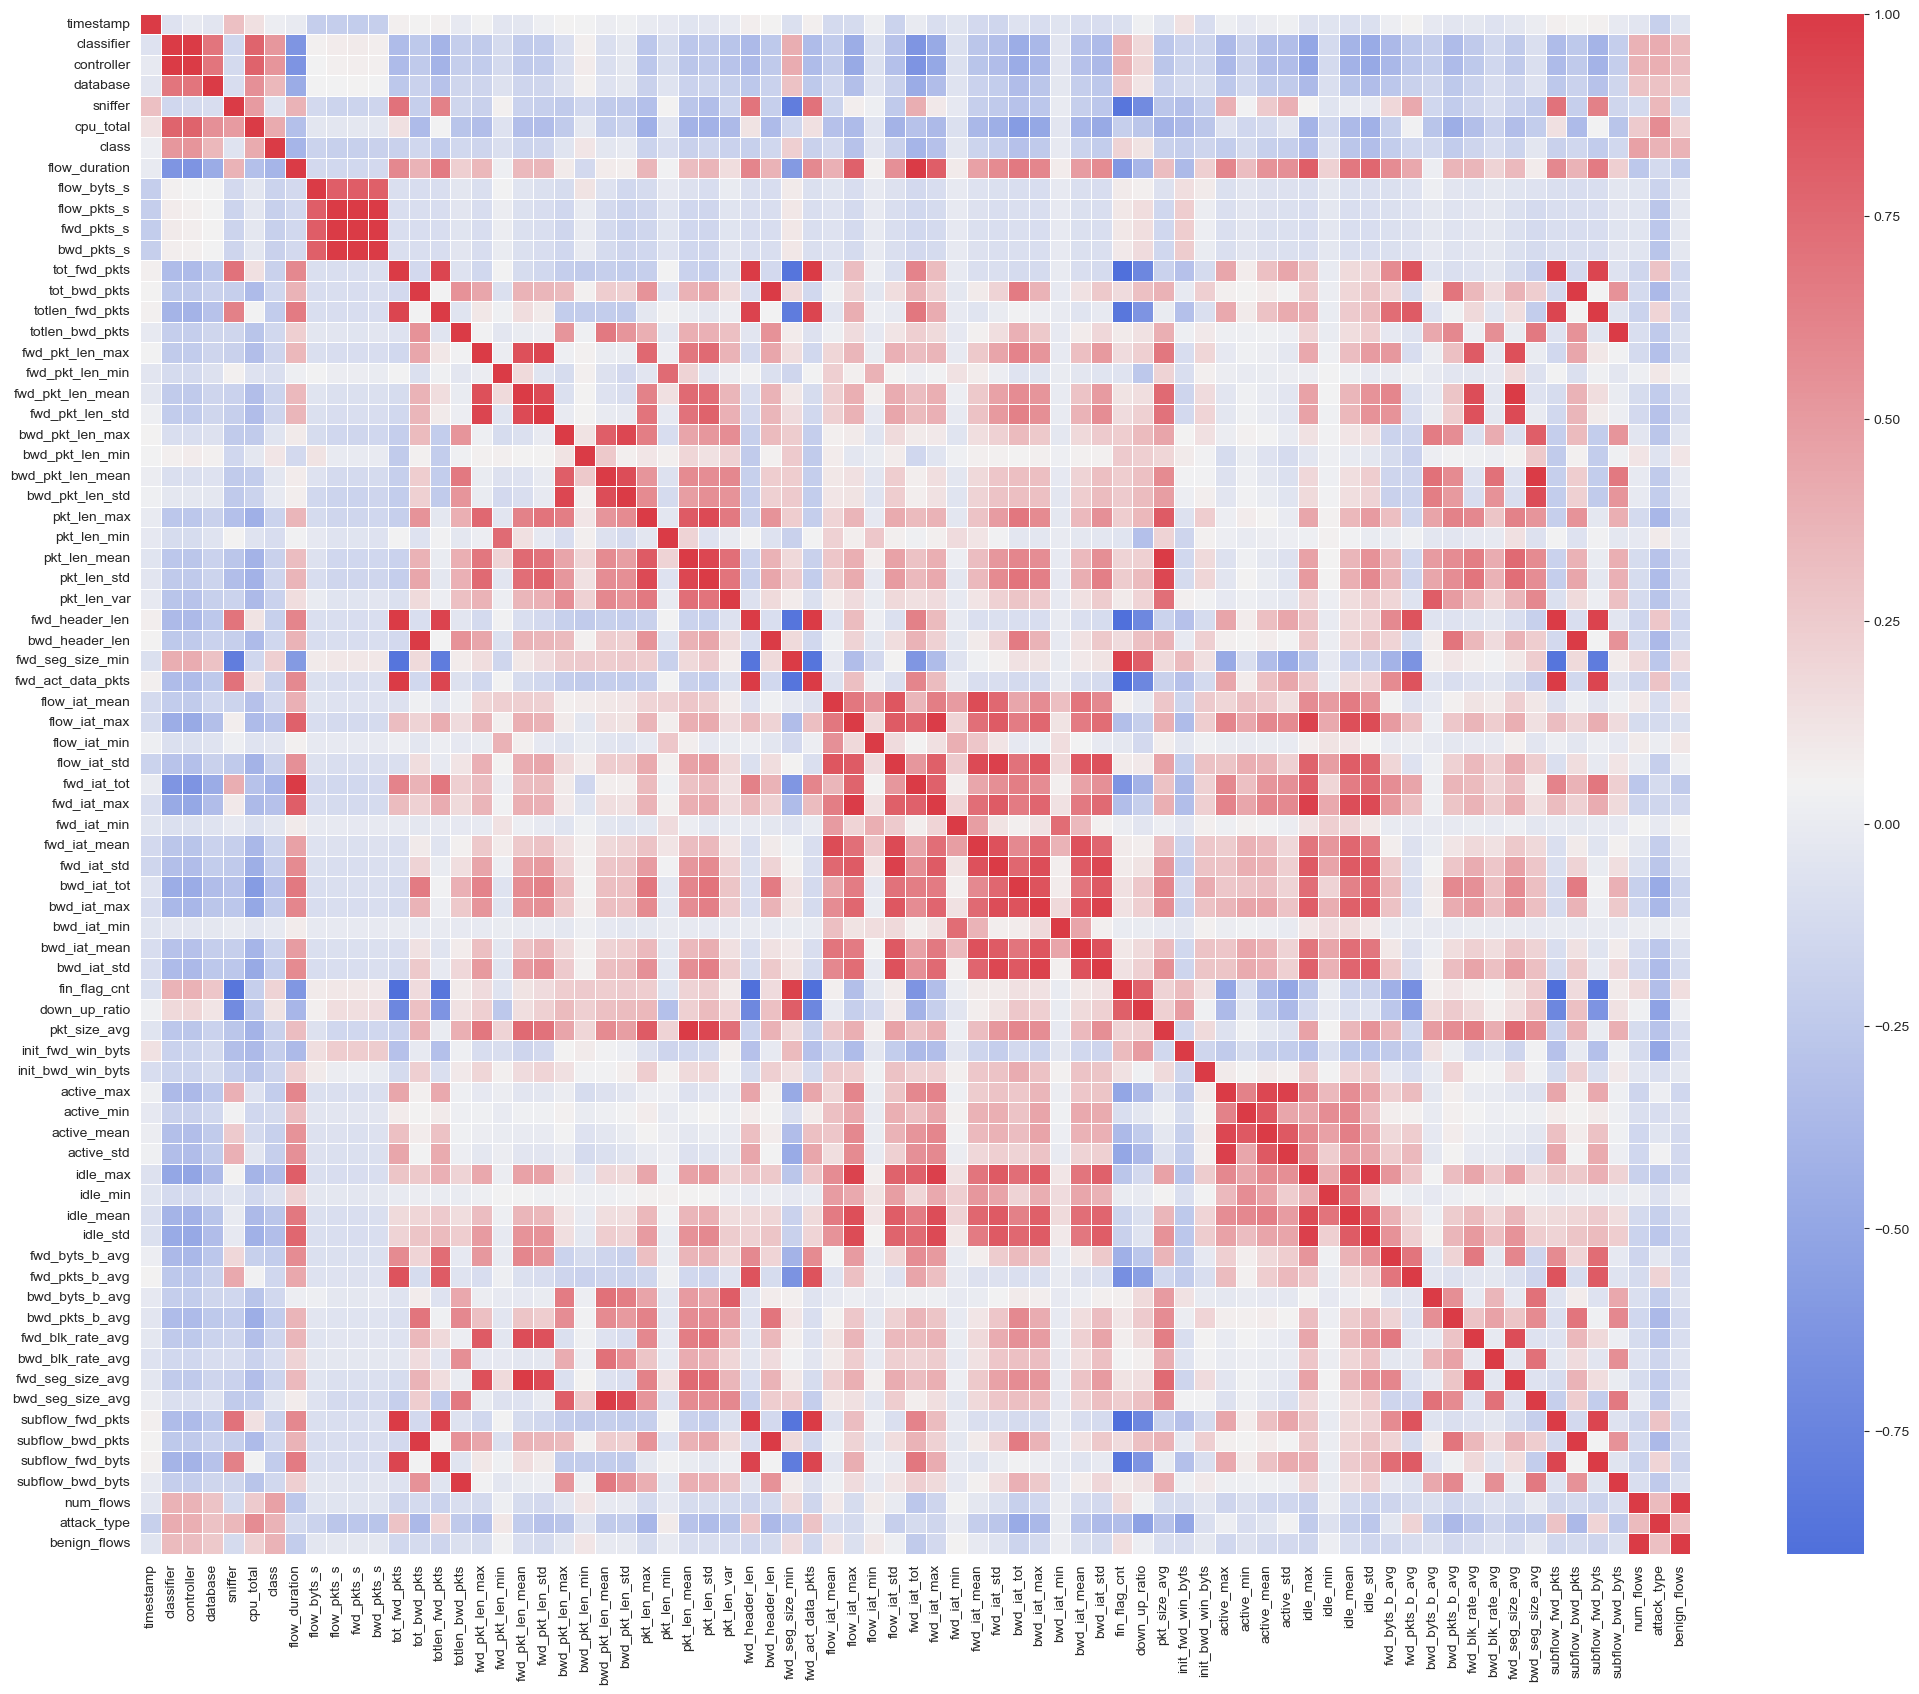

In [122]:
corr = df.drop('cpu', axis=1).corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.5, cmap=sns.diverging_palette(620, 10, as_cmap=True))
print(corr.shape)

[[1.20000000e+01 6.80000000e+01 0.00000000e+00 2.00000000e+00]
 [1.40000000e+01 7.00000000e+01 0.00000000e+00 2.00000000e+00]
 [2.60000000e+01 4.90000000e+01 0.00000000e+00 2.00000000e+00]
 [1.30000000e+01 6.90000000e+01 0.00000000e+00 2.00000000e+00]
 [1.80000000e+01 6.60000000e+01 0.00000000e+00 2.00000000e+00]
 [1.50000000e+01 7.10000000e+01 0.00000000e+00 2.00000000e+00]
 [2.20000000e+01 6.70000000e+01 0.00000000e+00 2.00000000e+00]
 [3.00000000e+01 7.80000000e+01 5.10561657e-07 3.00000000e+00]
 [3.20000000e+01 7.50000000e+01 9.75652414e-05 3.00000000e+00]
 [9.00000000e+00 1.00000000e+01 5.37090952e-04 2.00000000e+00]
 [2.90000000e+01 8.30000000e+01 9.92297109e-04 4.00000000e+00]
 [1.10000000e+01 8.40000000e+01 2.15117334e-03 3.00000000e+00]
 [7.00000000e+00 3.70000000e+01 2.89444013e-03 2.00000000e+00]
 [7.20000000e+01 7.40000000e+01 5.97063519e-03 2.00000000e+00]
 [1.00000000e+00 2.00000000e+00 7.36423104e-03 2.00000000e+00]
 [3.40000000e+01 3.80000000e+01 1.12694371e-02 2.000000

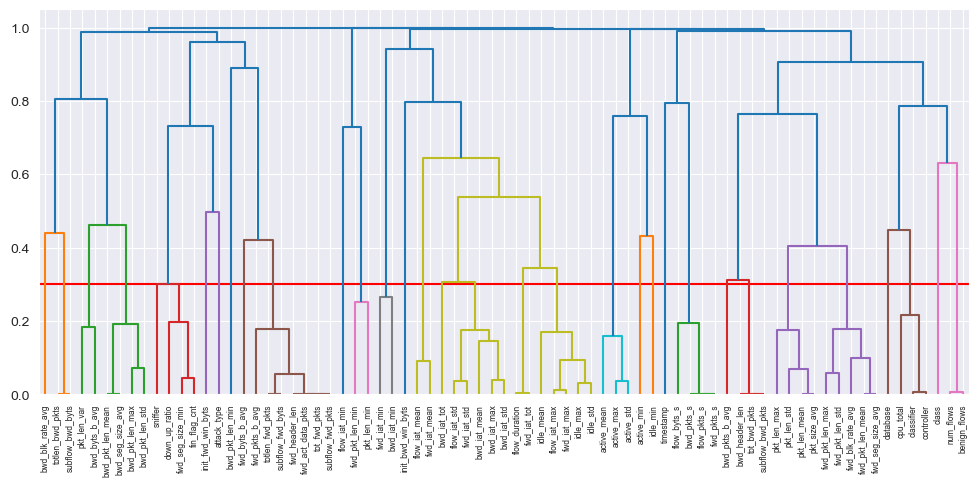

In [123]:
plt.figure(figsize=(12,5))
dissimilarity = 1-abs(corr)
Z = linkage(squareform(dissimilarity), 'complete')
print(abs(Z))
plt.axhline(y=.3, c="red")
dendrogram(abs(Z), labels=corr.columns, orientation='top',
           leaf_rotation=90)
plt.show()

Drop correlated features

In [112]:
# df_corr= corr_df
# # df_corr= df_corr.get(["class", "flow_duration"])
# df_corr= df_corr.drop(["flow_byts_s", "totlen_fwd_pkts"], axis=1)
corr = corr.get(['attack_type', 'class', 'benign_flows', 'num_flows', 'bwd_blk_rate_avg', 'totlen_bwd_pkts', 'pkt_len_var', 'bwd_seg_size_avg', 'fin_flag_cnt', 'init_fwd_win_byts', 'bwd_pkt_len_min', 'fwd_byts_b_avg', 'tot_fwd_pkts', 'flow_iat_min', 'pkt_len_min', 'fwd_iat_min', 'init_bwd_win_byts', 'flow_iat_mean', 'bwd_iat_tot', 'flow_iat_std', 'flow_duration', 'idle_mean', 'active_mean', 'active_min', 'idle_min', 'flow_pkts_s', 'bwd_pkts_b_avg', 'tot_bwd_pkts', 'pkt_len_mean', 'fwd_pkt_len_mean'])

(30, 30)


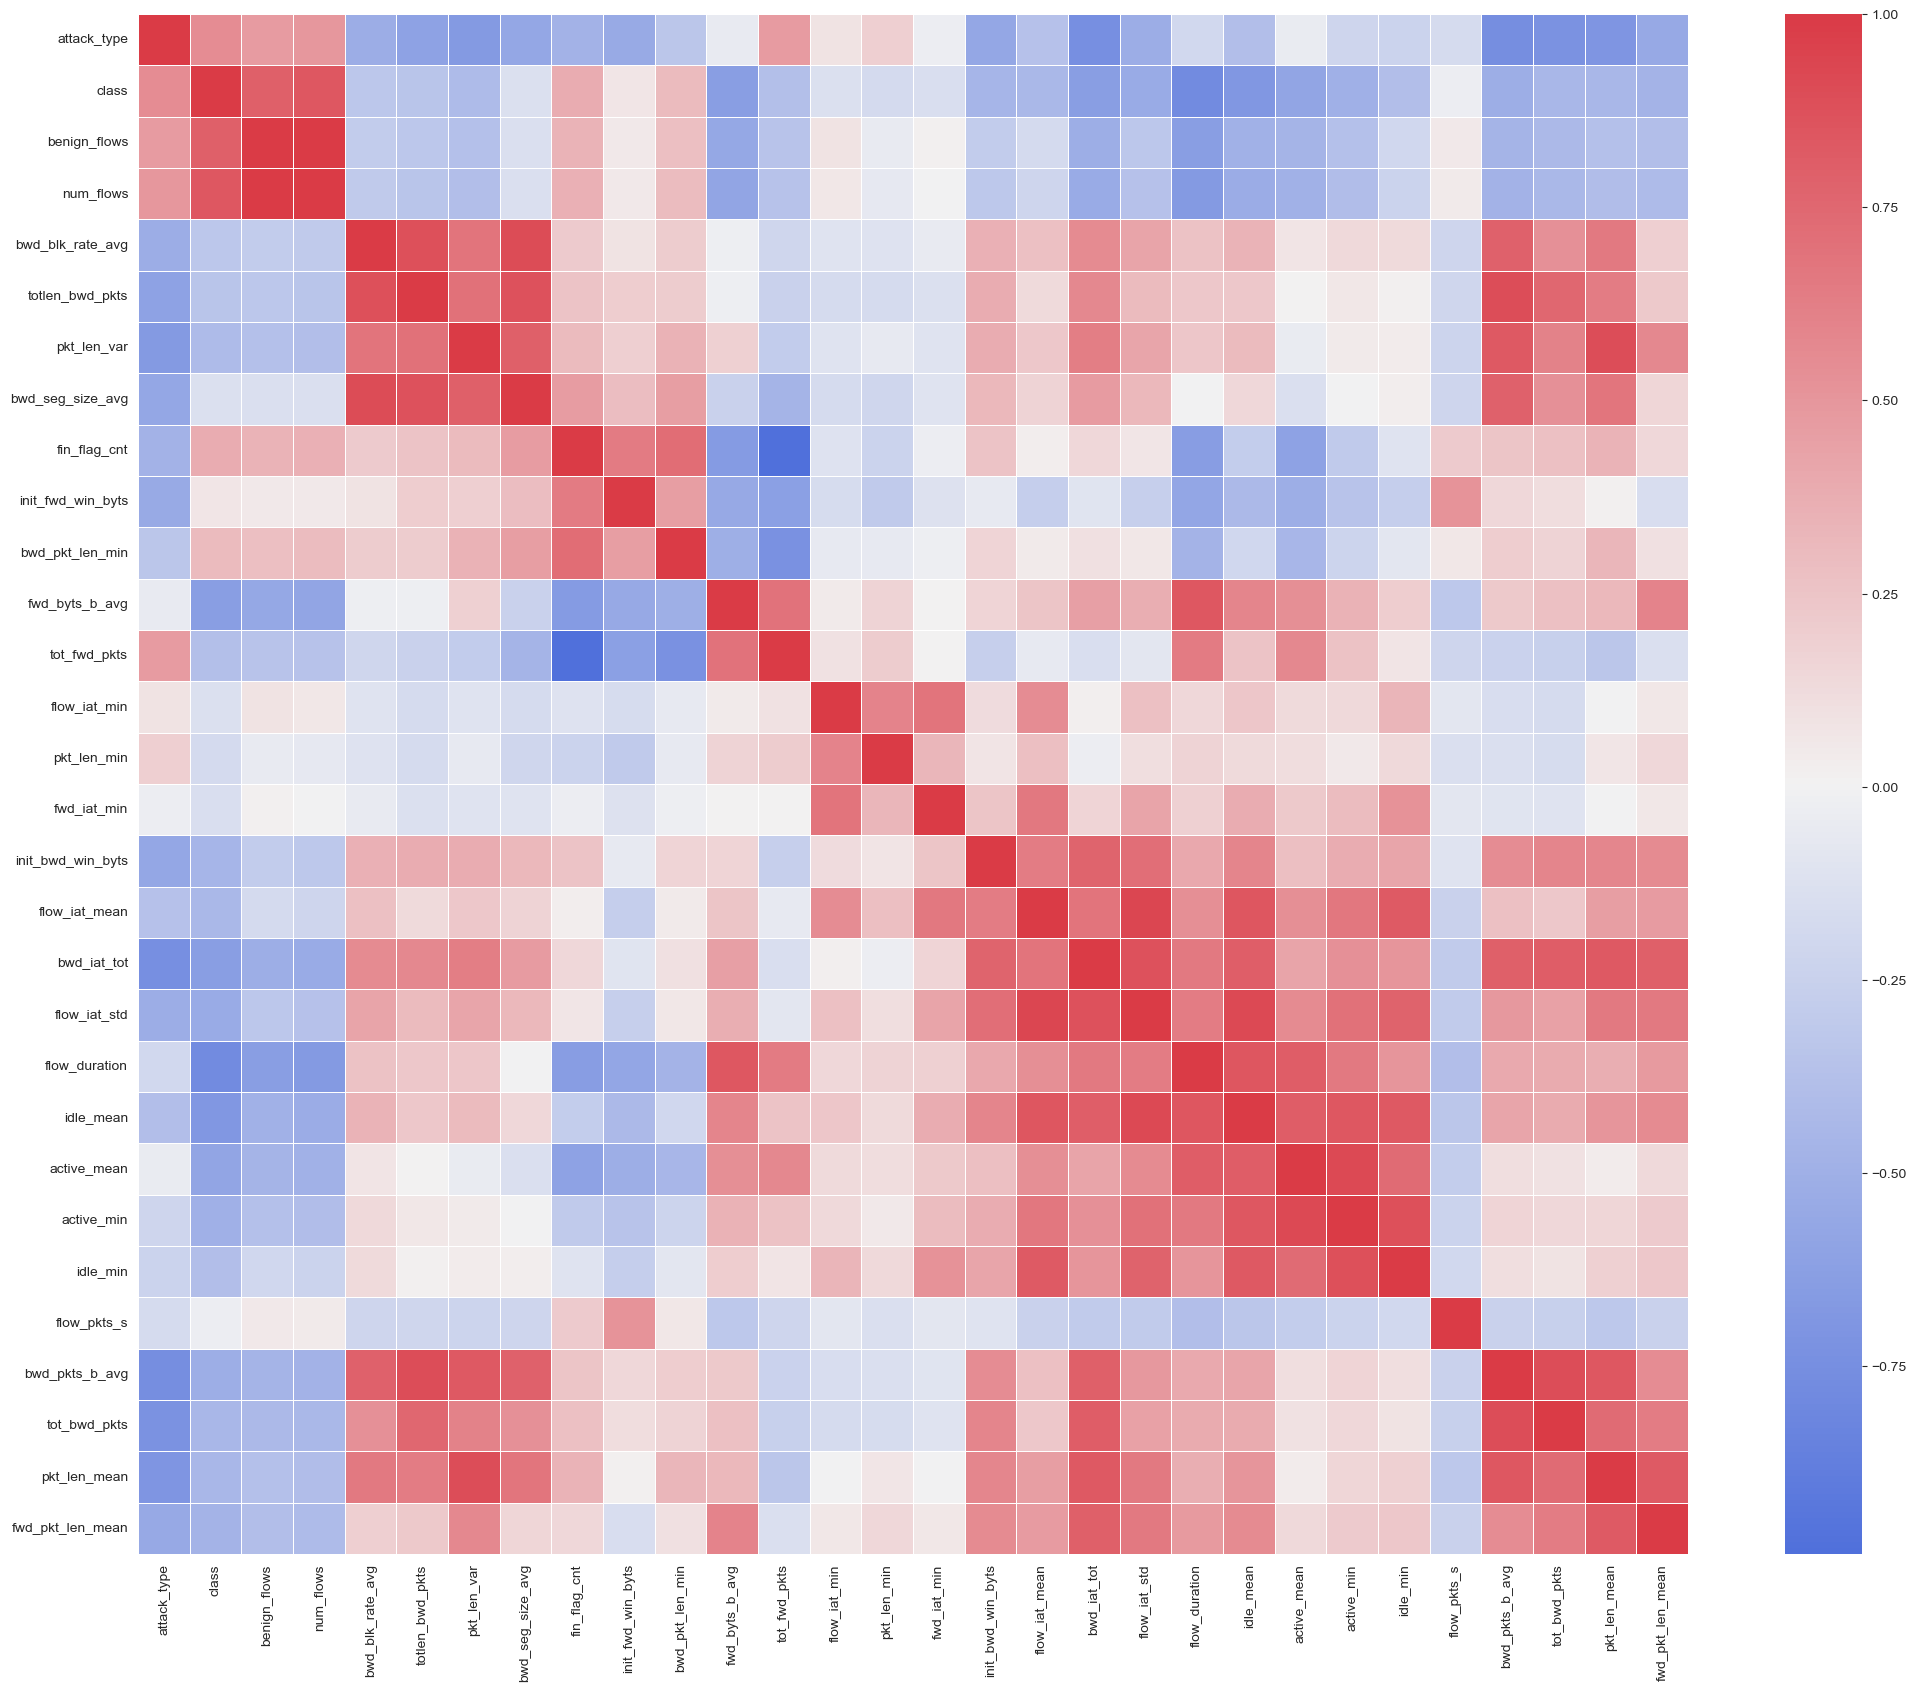

In [113]:
corr = corr.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.5, cmap=sns.diverging_palette(620, 10, as_cmap=True))
print(corr.shape)

[[2.00000000e+00 3.00000000e+00 2.92808417e-03 2.00000000e+00]
 [8.00000000e+00 1.20000000e+01 7.21086924e-03 2.00000000e+00]
 [1.70000000e+01 1.90000000e+01 6.67252236e-02 2.00000000e+00]
 [2.20000000e+01 2.30000000e+01 7.88485997e-02 2.00000000e+00]
 [4.00000000e+00 7.00000000e+00 9.63452410e-02 2.00000000e+00]
 [2.60000000e+01 2.70000000e+01 1.06157809e-01 2.00000000e+00]
 [6.00000000e+00 2.80000000e+01 1.07690088e-01 2.00000000e+00]
 [5.00000000e+00 3.40000000e+01 1.31869714e-01 3.00000000e+00]
 [2.10000000e+01 3.20000000e+01 1.51821902e-01 3.00000000e+00]
 [1.10000000e+01 2.00000000e+01 1.59913741e-01 2.00000000e+00]
 [1.00000000e+00 3.00000000e+01 2.04560339e-01 3.00000000e+00]
 [1.80000000e+01 3.50000000e+01 2.05370747e-01 3.00000000e+00]
 [2.40000000e+01 3.80000000e+01 2.23689580e-01 4.00000000e+00]
 [1.00000000e+01 3.10000000e+01 2.75181577e-01 3.00000000e+00]
 [0.00000000e+00 4.10000000e+01 2.78836234e-01 4.00000000e+00]
 [1.30000000e+01 1.50000000e+01 3.16295494e-01 2.000000

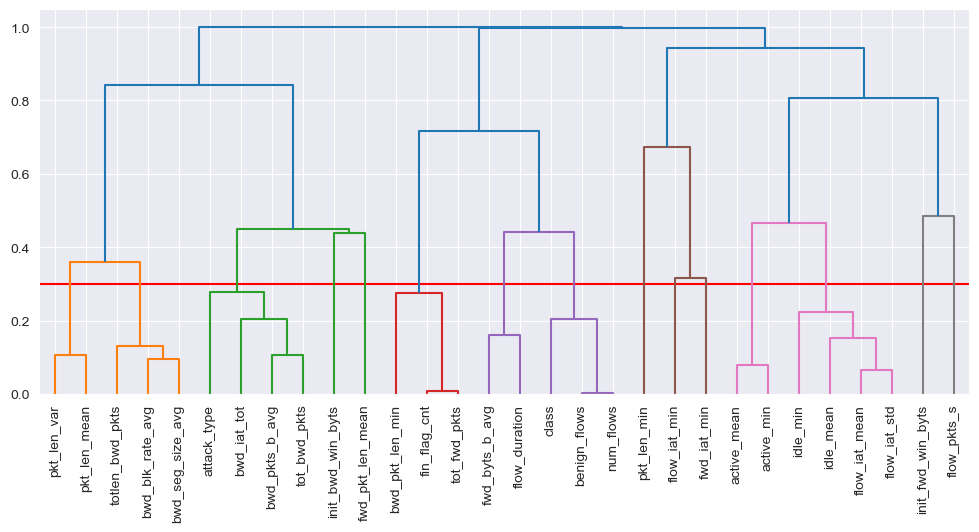

In [114]:
plt.figure(figsize=(12,5))
dissimilarity = 1-abs(corr)
Z = linkage(squareform(dissimilarity), 'complete')
print(abs(Z))
plt.axhline(y=.3, c="red")
dendrogram(abs(Z), labels=corr.columns, orientation='top',
           leaf_rotation=90)
plt.show()

In [124]:
# corr = corr.get(['attack_type', 'class', 'num_flows', 'bwd_seg_size_avg', 'tot_fwd_pkts', 'flow_iat_min', 'pkt_len_min', 'flow_iat_mean', 'flow_duration', 'idle_mean', 'active_mean', 'flow_pkts_s', 'tot_bwd_pkts', 'pkt_len_mean', 'fwd_pkt_len_mean'])
# corr = corr.get(['attack_type', 'num_flows', 'flow_iat_min', 'flow_iat_mean', 'flow_duration'])
corr = corr.get(['attack_type', 'class', 'num_flows', 'flow_iat_min'])

(4, 4)


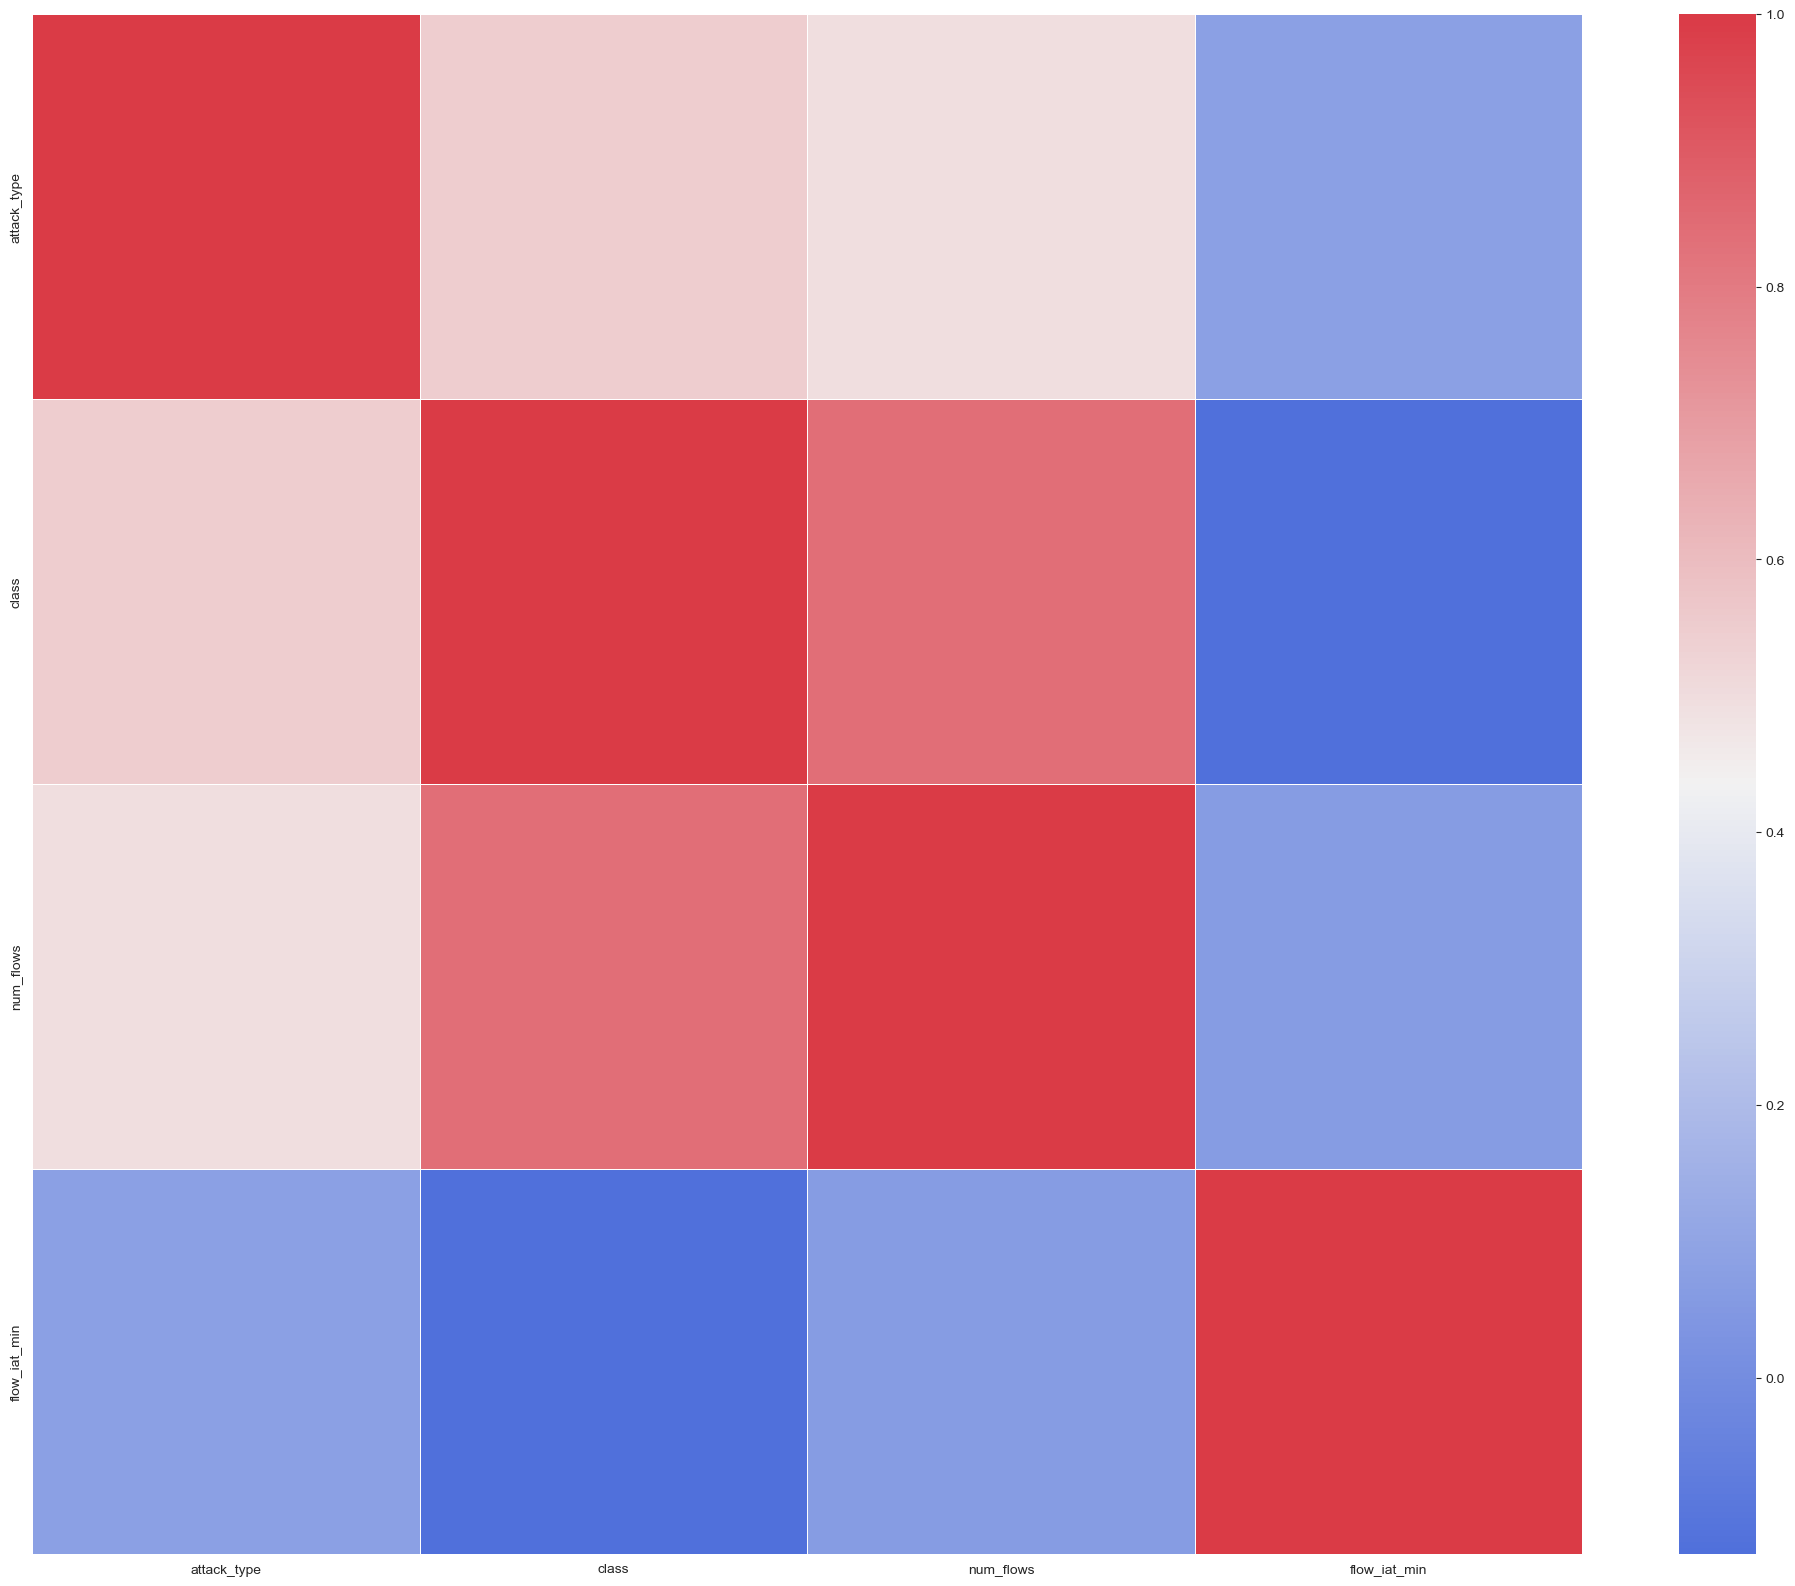

In [125]:
corr = corr.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.5, cmap=sns.diverging_palette(620, 10, as_cmap=True))
print(corr.shape)

[[1.         2.         0.16054639 2.        ]
 [0.         4.         0.50398419 3.        ]
 [3.         5.         0.93651532 4.        ]]


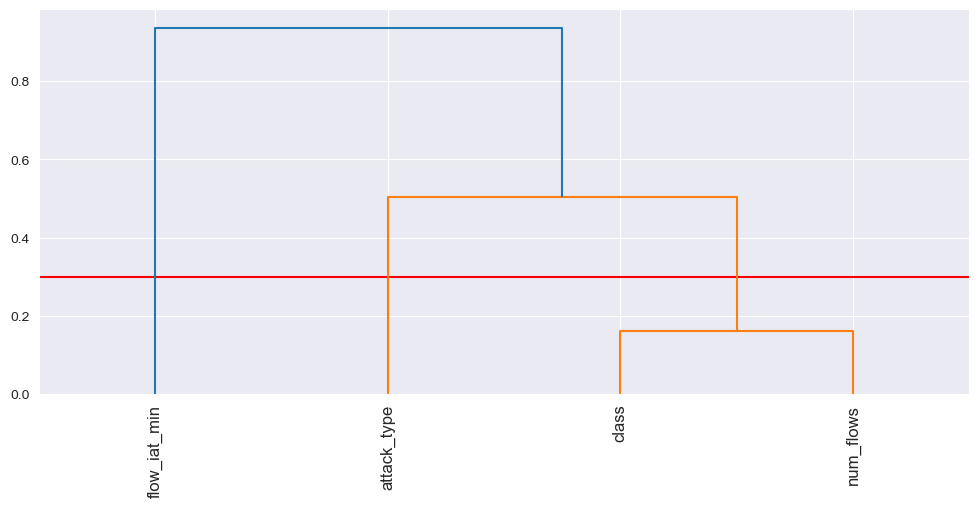

In [126]:
plt.figure(figsize=(12,5))
dissimilarity = 1-abs(corr)
Z = linkage(squareform(dissimilarity), 'complete')
print(abs(Z))
plt.axhline(y=.3, c="red")
dendrogram(abs(Z), labels=corr.columns, orientation='top',
           leaf_rotation=90)
plt.show()

In [ ]:
# r1 = df_corr.corr(method='spearman')
# sns.heatmap(r1, vmin=-1, vmax=1)

In [ ]:
# r1 = df_corr.corr(method='spearman')
# plt.figure(figsize=(12, 5))
# dissimilarity = 1 - abs(r1)
# Z = linkage(squareform(dissimilarity), 'complete')
# plt.axhline(y=.3, c="red")
# dendrogram(Z, labels=df_corr.columns, orientation='top',
#            leaf_rotation=90);

In [95]:
# import numpy as np
# def discretize_by_median(data, column, median_value, margin=0.0):
#     # Define the margin around the median
#     lower_bound = median_value - margin
#     upper_bound = median_value + margin
#
#     # Filter out points around the median
#     filtered_data = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
#
#     # Discretize the filtered data
#     filtered_data[column + '_discretized'] = pd.cut(filtered_data[column],
#                                                     bins=[filtered_data[column].min(), median_value, filtered_data[column].max()],
#                                                     labels=[0, 1])
#     return filtered_data
#
# print(np.median(df['cpu']))
# df= discretize_by_median(df, 'cpu', np.median(df['cpu']) )
# df[df['cpu_discretized']==0]

0.97868


C:\Users\hr_mo\AppData\Local\Temp\ipykernel_17196\2648645974.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[column + '_discretized'] = pd.cut(filtered_data[column],


,class,dst_port,protocol,timestamp,flow_duration,flow_byts_s,flow_pkts_s,fwd_pkts_s,bwd_pkts_s,tot_fwd_pkts,...,bwd_blk_rate_avg,fwd_seg_size_avg,bwd_seg_size_avg,subflow_fwd_pkts,subflow_bwd_pkts,subflow_fwd_byts,subflow_bwd_byts,cpu,attack_type,cpu_discretized
2,0,22,6,22062.0,1.530902e+05,2.233977e+04,65.320951,32.660476,32.660476,5,...,0.0,253.200000,430.80,5,5,1266,2154,0.967640,0,0
3,0,6443,6,2544.0,2.438068e+03,2.020862e+06,4921.929200,2871.125367,2050.803833,7,...,0.0,351.857143,492.80,7,5,2463,2464,0.015026,0,0
4,0,80,6,19120.0,3.149548e+07,6.540621e+00,0.095252,0.095252,0.000000,3,...,0.0,68.666667,0.00,3,0,206,0,0.020080,0,0
5,0,21,6,9906.0,3.099442e+00,4.129776e+07,645277.538462,322638.769231,322638.769231,1,...,0.0,74.000000,54.00,1,1,74,54,0.041671,0,0
6,0,500,17,30586.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1,...,0.0,542.000000,0.00,1,0,542,0,0.021556,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91928,1,22,6,19560.0,8.454556e+06,2.026127e+02,1.182794,0.709677,0.473118,6,...,0.0,70.666667,322.25,6,4,424,1289,0.026744,4,0
91929,1,80,6,24524.0,5.018182e+06,4.936050e+02,1.992753,1.195652,0.797101,6,...,0.0,131.500000,422.00,6,4,789,1688,0.022026,4,0
91930,1,80,6,24911.0,5.009157e+06,5.252381e+02,1.996344,1.197806,0.798538,6,...,0.0,157.166667,422.00,6,4,943,1688,0.025567,4,0
91931,1,80,6,25042.0,5.010459e+06,5.424653e+02,1.995825,1.197495,0.798330,6,...,0.0,171.666667,422.00,6,4,1030,1688,0.024977,4,0


In [43]:
# X= df.drop(['flow_iat_mean', 'flow_iat_std', 'flow_iat_mean', 'fwd_pkts_b_avg', 'fwd_byts_b_avg', 'subflow_bwd_pkts', 'tot_bwd_pkts', 'fwd_pkts_s', 'bwd_byts_b_avg', 'bwd_blk_rate_avg', 'bwd_pkts_s', 'subflow_bwd_pkts', 'totlen_bwd_pkts', 'bwd_header_len', 'flow_pkts_s', 'fwd_pkt_len_mean', 'fwd_seg_size_avg', 'fwd_pkt_len_std', 'pkt_len_max', 'pkt_len_mean', 'pkt_size_avg', 'pkt_len_std', 'pkt_len_var', 'flow_byts_s', 'totlen_bwd_pkts', 'flow_iat_max', 'idle_max', 'fwd_pkt_len_min', 'nb_flows', 'active_mean', 'active_max', 'active_std', 'subflow_bwd_pkts', 'totlen_bwd_pkts', 'bwd_pkt_len_std', 'bwd_seg_size_avg', 'bwd_pkt_len_mean', 'bwd_pkt_len_max', 'fwd_seg_size_min', 'down_up_ratio', 'bwd_iat_tot', 'init_bwd_win_byts', 'bwd_iat_mean', 'bwd_iat_max', 'fwd_iat_min', 'nb_ports', 'init_fwd_win_byts', 'bwd_iat_min', 'tot_fwd_pkts', 'subflow_bwd_byts', 'totlen_fwd_pkts', 'subflow_fwd_pkts', 'subflow_fwd_byts', 'classifier', 'classifier_discretized'], axis=1)
# X= df.drop(['cpu_total_discretized','cpu_total'], axis=1)
# test_df = df.sample(n=100)

# By attack
# df = df[(df['attack_type'] == 0) | (df['attack_type'] == 2)]

# Method 1
X = df.get(['attack_type', 'class', 'num_flows'])#, 'benign_flows', 'flow_iat_min'])
# X = df.get(["flow_duration", "class", "attack_type", "flow_pkts_s", "tot_fwd_pkts"])
y = df['cpu']
# Descretisized
# Y = df['cpu_discretized']

# Method 2
# X = df.get(["class", "attack_type", "num_flows", "tot_fwd_pkts"])
# Y = df['cpu_total']
# Descretisized
# Y = df['cpu_total_discretized']

PyALE._ALE_generic:INFO: Discrete feature detected.


Index(['attack_type', 'class', 'num_flows'], dtype='object')
Mean Squared Error: 0.04459161861984138
Mean Absolute Error: 0.10100142152656282
R-squared Score: 0.15461198146561028


PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.


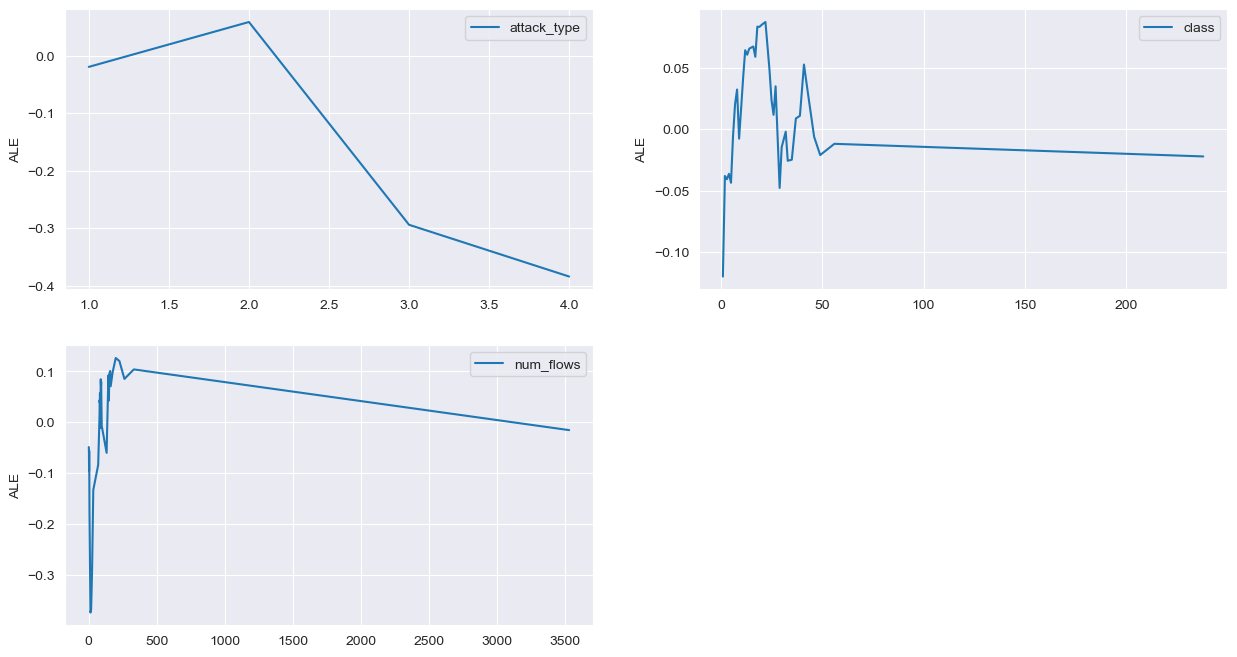

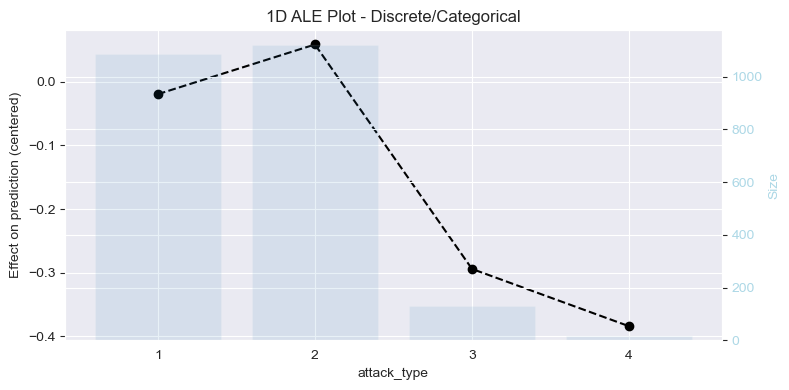

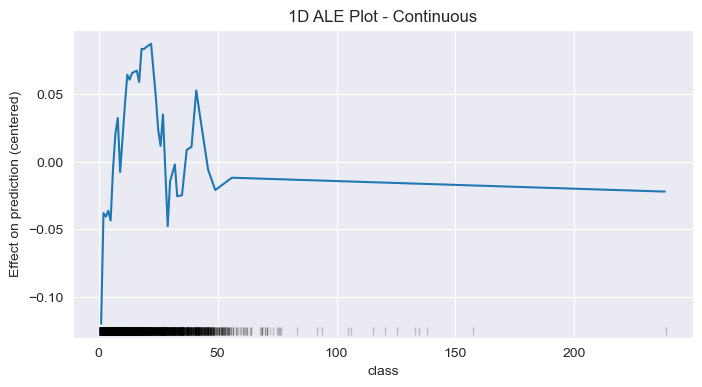

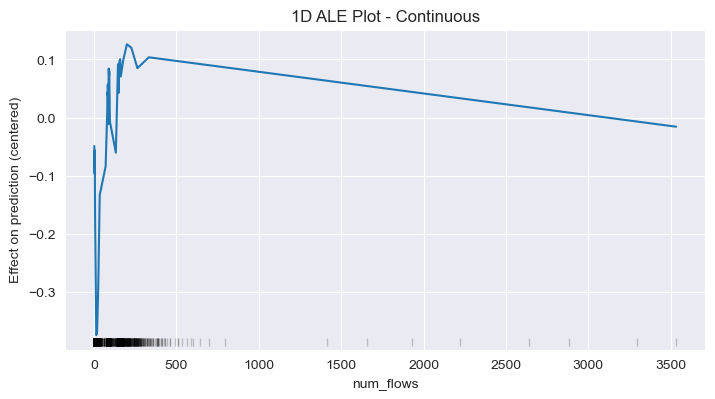

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from PyALE import ale
import math

y = np.nan_to_num(y, nan=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = BaggingRegressor()
model = model.fit(X_train, y_train)
feature_list = X_train.columns
print(feature_list)

# Classification metrics

# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)

# Regression metrics

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

# Define the number of rows and columns for your subplot grid
num_cols = 2
num_rows = math.ceil(len(feature_list) / num_cols)

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows))

# Loop over each feature and plot its impact
for i, feature in enumerate(feature_list):
    row = i // num_cols
    col = i % num_cols

    ale_eff = ale(X=X, model=model, feature=[feature], grid_size=50, include_CI=False)
    # print(ale_eff)

    # Plot the ALE plot for the current feature
    axes[row, col].plot(ale_eff['eff'], label=feature)
    axes[row, col].set_ylabel("ALE")
    axes[row, col].legend()

# Hide any empty subplots
for j in range(len(feature_list), num_rows * num_cols):
    row = j // num_cols
    col = j % num_cols
    fig.delaxes(axes[row, col])

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Show the plot
plt.show()


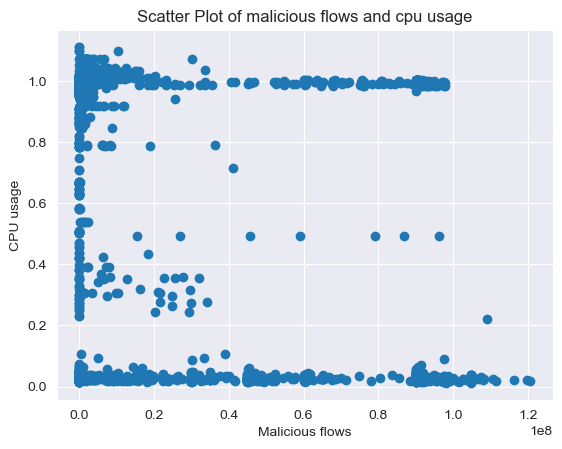

In [82]:
# Scatter plot
plt.scatter(df["flow_duration"], df["cpu_total"])

# Adding labels and title
plt.xlabel('Malicious flows')
plt.ylabel('CPU usage')
plt.title('Scatter Plot of malicious flows and cpu usage')

# Display the plot
plt.show()